In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [160]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [161]:
train_original=train.copy()
test_original=test.copy()

In [162]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [163]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


## Data Cleaning

In [164]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [165]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [166]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

In [167]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [168]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [169]:
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True)

In [170]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

## EDA

<AxesSubplot:title={'center':'Loan Status'}>

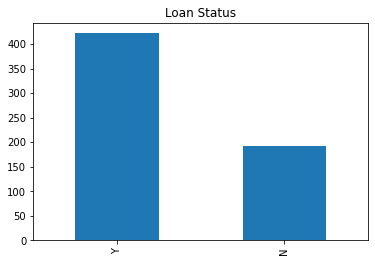

In [47]:
train['Loan_Status'].value_counts().plot.bar(title='Loan Status')

<AxesSubplot:title={'center':'Self Employed'}>

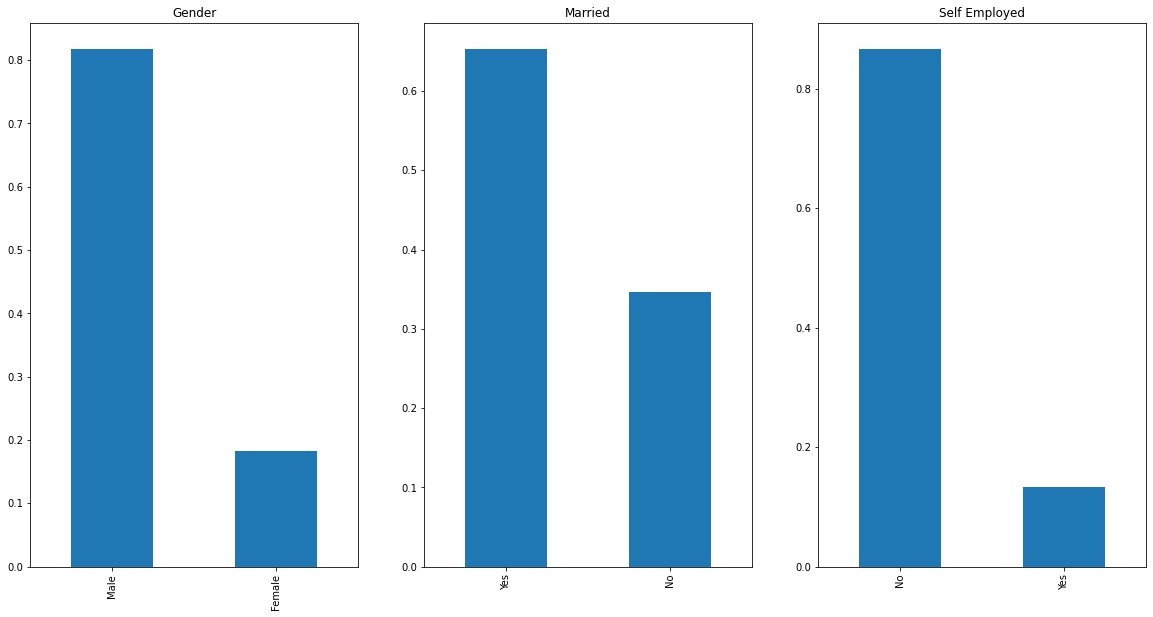

In [52]:
plt.figure(1)
plt.subplot(131)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')
plt.subplot(132)
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married')
plt.subplot(133)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self Employed')

<AxesSubplot:title={'center':'Property Area'}>

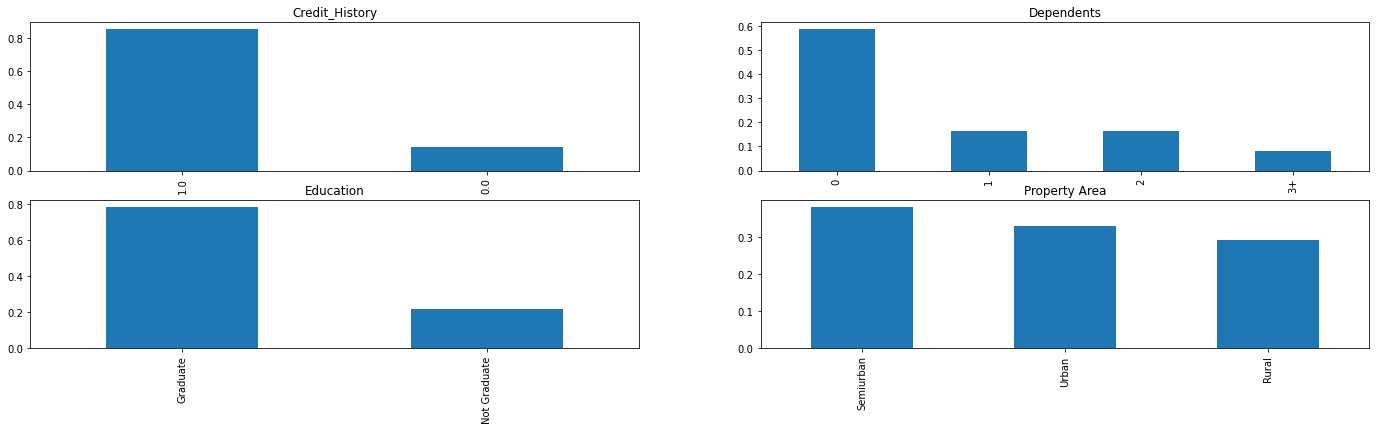

In [53]:
plt.figure(1)
plt.subplot(221)
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')
plt.subplot(222)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title='Dependents')
plt.subplot(223)
train['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.subplot(224)
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property Area')

C:\Users\ruize\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

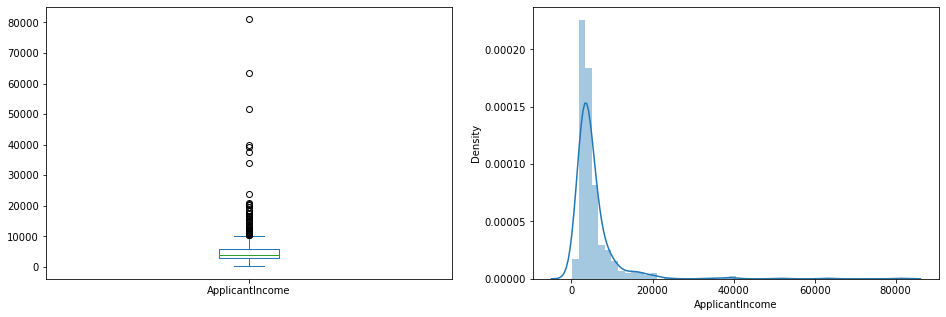

In [95]:
plt.figure(1)
plt.subplot(121)
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.subplot(122)
sns.distplot(train['ApplicantIncome'])

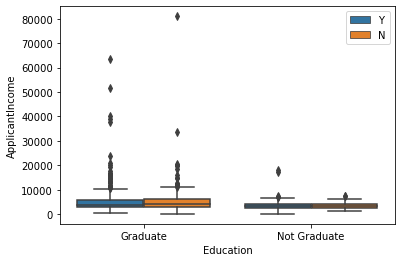

In [107]:
sns.boxplot(y='ApplicantIncome',x='Education',hue='Loan_Status',data=train)
plt.legend(loc='best')

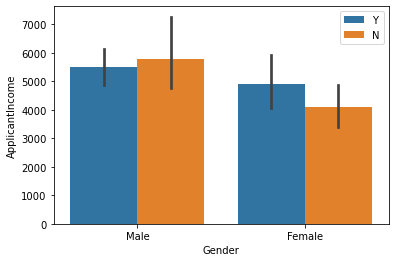

In [103]:
sns.barplot(x='Gender', y='ApplicantIncome', hue='Loan_Status', data=train, estimator=np.mean)
plt.legend(loc = 'best')

In [171]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
bins = [0,2500,4000,6000,81000] 
group=['Low', 'Average', 'High', 'Very High']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Total_Income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,High
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,Very High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,High
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0,Average
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0,High
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0,Very High
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0,Very High


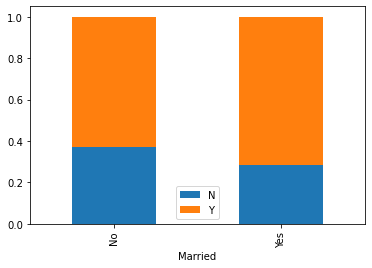

In [110]:
Married = pd.crosstab(train['Married'], train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(6,4))
plt.legend(loc = 'best')

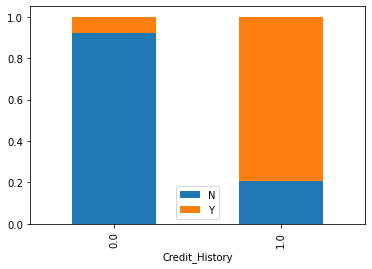

In [113]:
Credit_History = pd.crosstab(train['Credit_History'], train['Loan_Status'])
Credit_History.div(Credit_History.sum(1),axis=0).plot(kind='bar', stacked=True, figsize=(6,4))
plt.legend(loc = 'best')

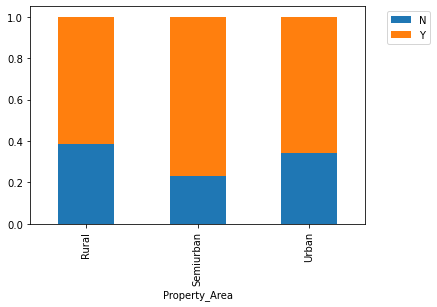

In [120]:
Property_Area = pd.crosstab(train['Property_Area'], train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(6,4))
plt.legend(bbox_to_anchor=(1.05,1.0),loc='best')

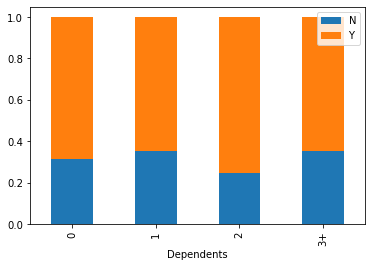

In [119]:
Dependents = pd.crosstab(train['Dependents'], train['Loan_Status'])
Dependents.div(Dependents.sum(1),axis=0).plot(kind='bar', stacked=True, figsize=(6,4))
plt.legend(loc = 'best')

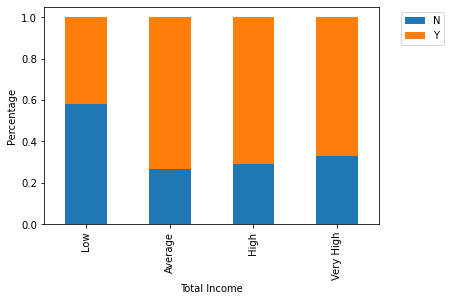

In [89]:
Total_Income_bin = pd.crosstab(train['Total_Income_bin'], train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1),axis=0).plot.bar(stacked=True)
plt.xlabel('Total Income')
plt.ylabel('Percentage')
plt.legend(bbox_to_anchor=(1.05,1.0),loc='best')

In [93]:
Total_Income_bin = pd.crosstab(train['Total_Income_bin'], train['Loan_Status'])
Total_Income_bin

Loan_Status,N,Y
Total_Income_bin,,
Low,14,10
Average,32,87
High,65,159
Very High,81,166


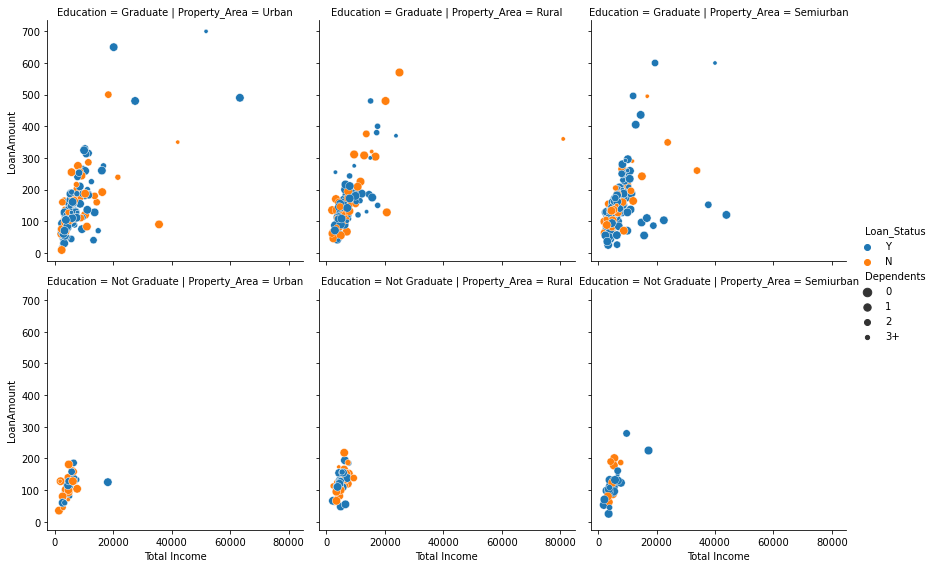

In [76]:
sns.color_palette('pastel')
ax = sns.relplot(data=train, kind='scatter', x='Total_Income',y='LoanAmount',hue='Loan_Status',col='Property_Area', height=4, row='Education', size='Dependents')
ax.set(xlabel="Total Income")
plt.show()

In [172]:
train=train.drop(['Loan_ID','Total_Income','Total_Income_bin'],axis=1)
test=test.drop(['Loan_ID'],axis=1)

In [173]:
train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [174]:
test.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [175]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [176]:
train['Dependents'].replace('3+', 3, inplace=True)
test['Dependents'].replace('3+', 3, inplace=True)
train['Loan_Status'].replace('N', 0, inplace=True)
train['Loan_Status'].replace('Y', 1, inplace=True)

<AxesSubplot:>

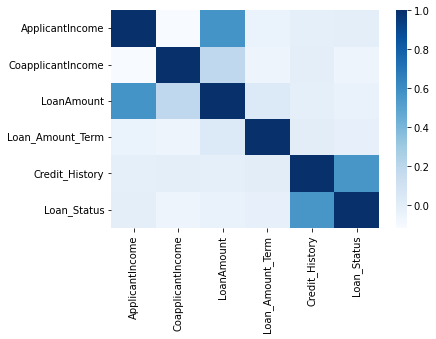

In [151]:
sns.heatmap(train.corr(),cmap='Blues')

## Model Building

In [177]:
X=train.drop('Loan_Status',axis=1)
y=train['Loan_Status']

In [188]:
X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [179]:
from sklearn.model_selection import train_test_split

In [189]:
X_train,X_test,y_train,y_test =  train_test_split(X,y,train_size=0.7)

## DecisionTree

In [181]:
from sklearn.tree import DecisionTreeClassifier

In [182]:
model= DecisionTreeClassifier(random_state=1)

In [183]:
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [184]:
predictions = model.predict(X_test)

In [185]:
from sklearn.metrics import accuracy_score, classification_report

In [186]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.42      0.47      0.44        53
           1       0.78      0.73      0.75       132

    accuracy                           0.66       185
   macro avg       0.60      0.60      0.60       185
weighted avg       0.67      0.66      0.67       185



In [187]:
print(accuracy_score(y_test,predictions))

0.6594594594594595


## RandomForest

In [190]:
from sklearn.ensemble import RandomForestClassifier

In [191]:
rfmodel= RandomForestClassifier(n_estimators=500)

In [192]:
rfmodel.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500)

In [195]:
rf = RandomForestClassifier(random_state=42)

In [203]:
params={'max_depth':[2,3,5,10,20],'min_samples_leaf':[5,10,20,50,100,200],'n_estimators':[10,25,30,50,200,500]}

In [204]:
from sklearn.model_selection import GridSearchCV

In [205]:
grid_search= GridSearchCV(estimator=rf,param_grid=params,cv=4,verbose=1,scoring='accuracy')

In [206]:
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 200, 500]},
             scoring='accuracy', verbose=1)

In [207]:
grid_search.best_score_

0.8113317757009346

In [215]:
rf_best=grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=2, min_samples_leaf=5, n_estimators=10,
                       random_state=42)

In [218]:
rfpredictions = rfmodel.predict(X_test)

In [220]:
print(classification_report(y_test,rfpredictions))

              precision    recall  f1-score   support

           0       0.73      0.42      0.53        57
           1       0.78      0.93      0.85       128

    accuracy                           0.77       185
   macro avg       0.76      0.68      0.69       185
weighted avg       0.77      0.77      0.75       185



In [217]:
print(accuracy_score(y_test,rfpredictions))

0.772972972972973


In [210]:
rf_best.feature_importances_

array([0.01201404, 0.11981779, 0.        , 0.06196848, 0.51259221,
       0.04061073, 0.00849083, 0.06562589, 0.07145708, 0.03421353,
       0.00753075, 0.01420912, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.02130185, 0.03016769])

In [214]:
imp_df=pd.DataFrame({'Varnmae':X_train.columns,'Imp':rf_best.feature_importances_})

In [212]:
imp_df.sort_values(by='Imp',ascending=False)

,Varnmae,Imp
4,Credit_History,0.512592
1,CoapplicantIncome,0.119818
8,Married_Yes,0.071457
7,Married_No,0.065626
3,Loan_Amount_Term,0.061968
5,Gender_Female,0.040611
9,Dependents_3,0.034214
19,Property_Area_Urban,0.030168
18,Property_Area_Semiurban,0.021302
11,Dependents_1,0.014209


## KNN

In [221]:
from sklearn.preprocessing import StandardScaler

In [222]:
scaler= StandardScaler()

In [223]:
scaler.fit(X)

StandardScaler()

In [224]:
scaled_features= scaler.transform(X)

In [232]:
df_feat = pd.DataFrame(scaled_features,columns=X.columns)
df_feat.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.072991,-0.554487,-0.211241,0.273231,0.411733,-0.472343,0.472343,1.372089,-1.372089,-0.300975,0.839974,-0.446339,-0.443713,0.528362,-0.528362,0.392601,-0.392601,-0.641478,-0.782016,1.428147
1,-0.134412,-0.038732,-0.211241,0.273231,0.411733,-0.472343,0.472343,-0.728816,0.728816,-0.300975,-1.190514,2.240448,-0.443713,0.528362,-0.528362,0.392601,-0.392601,1.558899,-0.782016,-0.700208
2,-0.393747,-0.554487,-0.948996,0.273231,0.411733,-0.472343,0.472343,-0.728816,0.728816,-0.300975,0.839974,-0.446339,-0.443713,0.528362,-0.528362,-2.547117,2.547117,-0.641478,-0.782016,1.428147
3,-0.462062,0.251980,-0.306435,0.273231,0.411733,-0.472343,0.472343,-0.728816,0.728816,-0.300975,0.839974,-0.446339,-0.443713,-1.892641,1.892641,0.392601,-0.392601,-0.641478,-0.782016,1.428147
4,0.097728,-0.554487,-0.056551,0.273231,0.411733,-0.472343,0.472343,1.372089,-1.372089,-0.300975,0.839974,-0.446339,-0.443713,0.528362,-0.528362,0.392601,-0.392601,-0.641478,-0.782016,1.428147


In [233]:
from sklearn.model_selection import train_test_split

In [234]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,y,test_size=0.30)

In [235]:
from sklearn.neighbors import KNeighborsClassifier

In [236]:
knn = KNeighborsClassifier(n_neighbors=1)

In [237]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [239]:
kpredictions = knn.predict(X_test)

In [240]:
print(classification_report(y_test,kpredictions))

              precision    recall  f1-score   support

           0       0.46      0.40      0.43        57
           1       0.75      0.79      0.77       128

    accuracy                           0.67       185
   macro avg       0.60      0.60      0.60       185
weighted avg       0.66      0.67      0.66       185



In [241]:
error_rate = []

for i in range(1,100):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    kpredictions_i = knn.predict(X_test)
    error_rate.append(np.mean(kpredictions_i != y_test))

Text(0, 0.5, 'Error Rate')

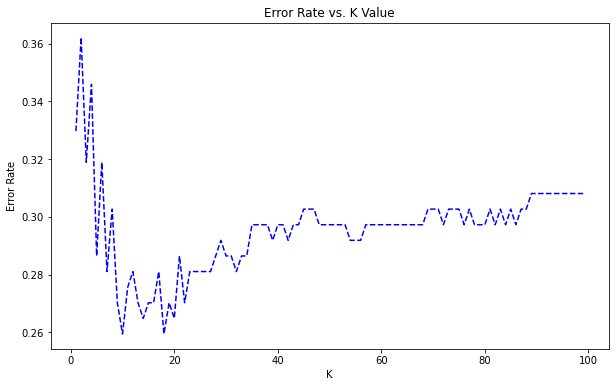

In [242]:
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [250]:
knn = KNeighborsClassifier(n_neighbors=19)

knn.fit(X_train,y_train)
kpredictions = knn.predict(X_test)
print(classification_report(y_test,kpredictions))

              precision    recall  f1-score   support

           0       0.89      0.14      0.24        57
           1       0.72      0.99      0.84       128

    accuracy                           0.73       185
   macro avg       0.81      0.57      0.54       185
weighted avg       0.77      0.73      0.65       185



In [251]:
print(accuracy_score(y_test,kpredictions))

0.7297297297297297


## Logisitic Regression

In [252]:
from sklearn.linear_model import LogisticRegression

In [253]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [254]:
Lpredictions =  logmodel.predict(X_test)

In [255]:
print(classification_report(y_test,Lpredictions))

              precision    recall  f1-score   support

           0       0.88      0.39      0.54        57
           1       0.78      0.98      0.87       128

    accuracy                           0.79       185
   macro avg       0.83      0.68      0.70       185
weighted avg       0.81      0.79      0.77       185



In [256]:
print(accuracy_score(y_test,Lpredictions))

0.7945945945945946
